##Artificial Neural Network

The dataset is "Date Fruit Dataset", available on Kaggle, classified into 7 classes according to their types.

In [1]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

###Dataset

In [2]:
data = pd.read_excel("date_fruit.xlsx")
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [3]:
print(data.shape)
print(data["Class"].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


###Preprocessing

In [4]:
# Create the features dataset
X = data.drop("Class", axis=1)

# Create the labels dataset
y = data.loc[:, 'Class']

####1.Feature Scaling

In [5]:
X_scaled = minmax_scale(X)
X = pd.DataFrame(X_scaled)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


In [6]:
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [7]:
# Create an LabelEncoder object
encoder = LabelEncoder()

# Convert string classes to integers
y = encoder.fit_transform(y)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

####2.Splitting

In [9]:
#Train and Validation set
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

In [10]:
#The lengths of datasets
print(f"Length of the dataset: {len(X)}")
print(f"Length of the training dataset: {len(X_train)}")
print(f"Length of the validation dataset: {len(X_val)}")
print(f"Length of the test dataset: {len(X_test)}")

Length of the dataset: 898
Length of the training dataset: 718
Length of the validation dataset: 90
Length of the test dataset: 90


###Constructing the Neural Network

In [11]:
import tensorflow as tf

In [12]:
# Create a model object
model = tf.keras.Sequential()

####Input Layer

In [13]:
#Create an input layer and add it to model object
input_layer = tf.keras.layers.Dense(4096, input_shape=(34, ), activation='relu')
model.add(input_layer)

####Hidden Layers

In [14]:
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

####Output Layer

In [15]:
model.add(tf.keras.layers.Dense(7, activation='softmax'))

####Optimizer

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###Training the model

In [17]:
results = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 3s 45ms/step - loss: 1.6772 - accuracy: 0.3719 - val_loss: 0.9427 - val_accuracy: 0.6889
Epoch 2/100
23/23 [==============================] - 1s 26ms/step - loss: 0.8182 - accuracy: 0.6797 - val_loss: 0.8876 - val_accuracy: 0.8111
Epoch 3/100
23/23 [==============================] - 0s 21ms/step - loss: 0.7524 - accuracy: 0.7047 - val_loss: 0.9314 - val_accuracy: 0.7778
Epoch 4/100
23/23 [==============================] - 0s 21ms/step - loss: 0.6106 - accuracy: 0.7549 - val_loss: 0.6967 - val_accuracy: 0.8222
Epoch 5/100
23/23 [==============================] - 0s 20ms/step - loss: 0.5431 - accuracy: 0.7855 - val_loss: 0.8533 - val_accuracy: 0.7889
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 0.5675 - accuracy: 0.7660 - val_loss: 0.8044 - val_accuracy: 0.8444
Epoch 7/100
23/23 [==============================] - 1s 30ms/step - loss: 0.5060 - accuracy: 0.7953 - val_loss: 1.1756 - val_accuracy: 0.6889
Epoch 

####Visualize the results

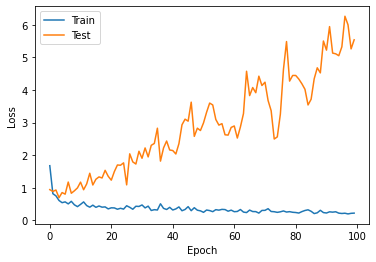

In [18]:
# Plot the the training loss
plt.plot(results.history['loss'], label='Train')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='Test')

# Name the x and y axises
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Put legend table to show labels
plt.legend()

# Show the plot
plt.show()

###Performance Evaluation

In [19]:
test_result = model.test_on_batch(X_test, y_test)

print(test_result)

[0.23051895201206207, 0.9222221970558167]
